# Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib

---

**Name**: Corpuz, Micki Laurren B.

**Section**: CPE22S3

**Submitted to**: Engr. Roman Richard

---

**Instructions:**

- Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

**Resources:**

- Download the following datasets: earthquakes-1.csv Download earthquakes-1.csv, fb_stock_prices_2018.csv

**Procedures:**

- 9.1 Introduction to Matplotlib

- 9.2 Plotting with Pandas
>

- 9.3 Pandas Plotting Subpackage
>

**Data Analysis:**

> Matplotlib is this super handy Python library that makes it easy to turn your data into visuals. I can create all kinds of plots—like scatter plots, box plots, histograms, and even combine a few plots into one. The first procedure provided a foundational understanding of how to create visualizations using Matplotlib. It covers essential plotting techniques such as line plots, scatter plots, histograms, and how to structure figures and subplots. This taught me how various customization options—like bin sizes in histograms or layout adjustments using gridspec—can significantly change the way data is interpreted and presented. 

> The second procedure taught me how to use the plot() method in pandas—powered by matplotlib—to bring data to life. It shows different types of plots to explore Facebook stock prices and earthquake data. For example, line plots help track trends over time, scatter and hexbin plots reveal relationships between variables, and box plots and histograms show how data is spread out. These visuals make it easier to spot things like stock price ups and downs, patterns in earthquake magnitudes, and areas where seismic activity and tsunamis are more common. All in all, it’s a great example of how versatile and powerful pandas can be for visualizing data. 

> The third procedure taught me how to use tools from pandas.plotting to better understand data. It uses a scatter matrix to quickly spot relationships between variables, and swaps in KDE plots to get a clearer view of their distributions. It also uses lag and autocorrelation plots to show patterns in Facebook’s stock prices over time, and a bootstrap plot to explore how trading volume varies. 

# Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:


1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
fb['fb_roll_20'] = fb['close'].rolling('20D').min()

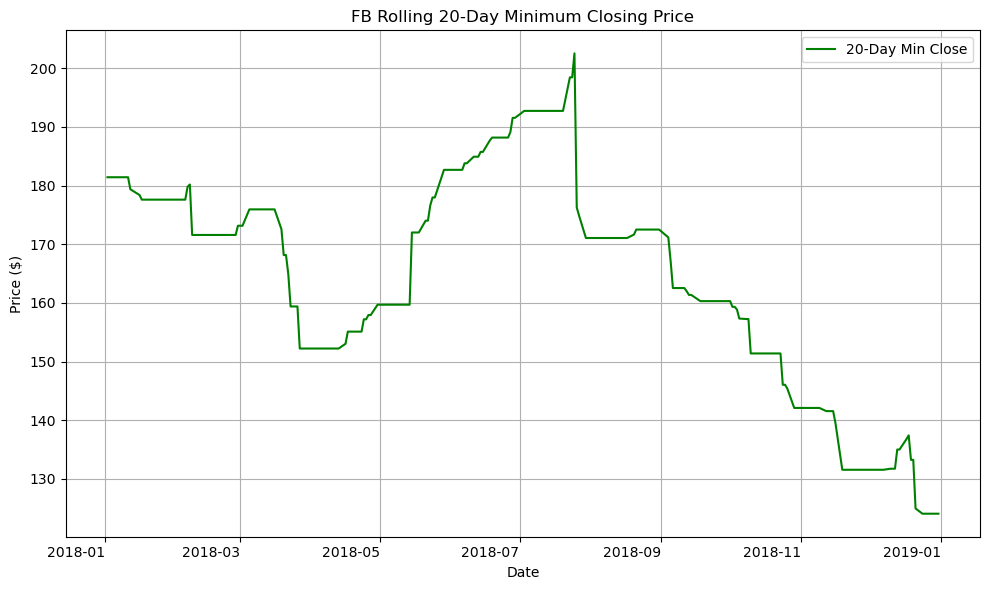

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

fb.plot(
    kind='line',
    y='fb_roll_20',
    style='green',
    ax=ax,
    title='FB Rolling 20-Day Minimum Closing Price',
)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.legend(['20-Day Min Close'])
ax.grid(True)

ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

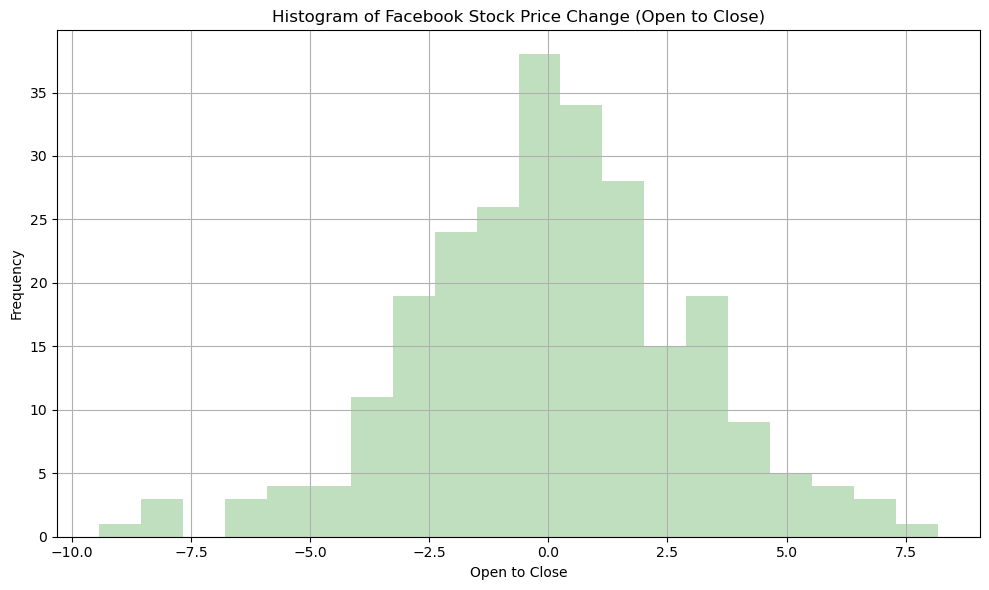

In [104]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Create the 'open_to_close' column
fb['open_to_close'] = fb['close'] - fb['open']

fb.open_to_close.plot(
    kind='hist',
    color='green',
    alpha=0.25,
    ax=ax,
    title='Histogram of Facebook Stock Price Change (Open to Close)',
    bins=20  
)

ax.set_xlabel('Open to Close')
ax.grid(True)

plt.tight_layout()
plt.show()

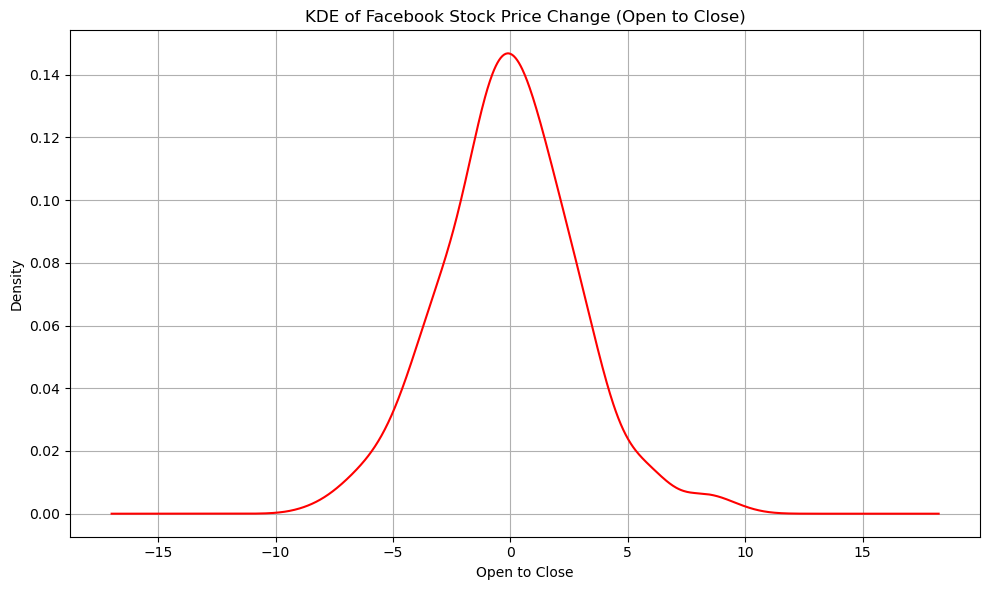

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the KDE on the created axes
fb.open_to_close.plot(
    kind='kde',
    color='red',
    ax=ax,  # Use the ax created with plt.subplots()
    title='KDE of Facebook Stock Price Change (Open to Close)'
)

ax.set_xlabel('Open to Close')
ax.grid(True)

plt.tight_layout()
plt.show()

> The union of the histogram and KDE allows for better insight.

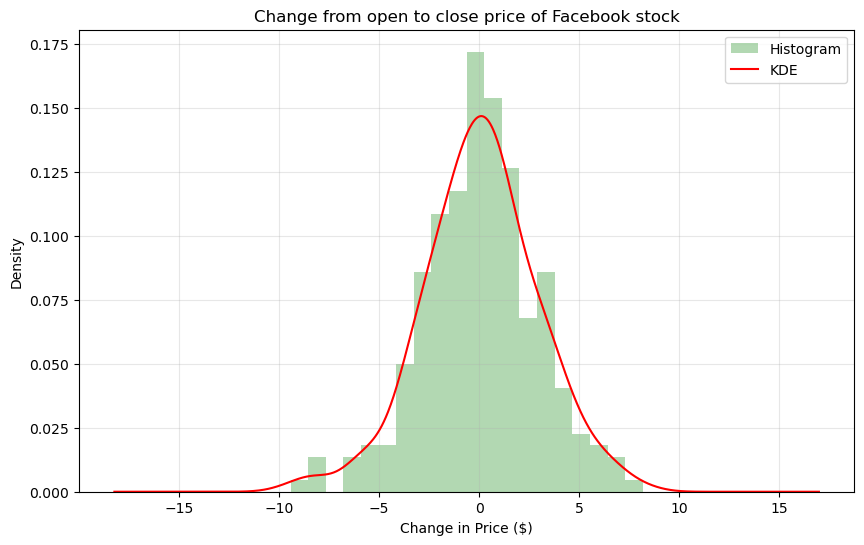

In [138]:
# Combine histogram and KDE into a single figure to allow direct visual comparison of distribution and density
fig, ax = plt.subplots(figsize=(10, 6))

fb['change'] = fb['close'] - fb['open']

# Plot the histogram 
fb['change'].plot(
    kind='hist',
    color='green',
    density=True,
    bins=20,
    alpha=0.3,
    ax=ax,
    title='Change from open to close price of Facebook stock'
)

# Plot the KDE
fb['change'].plot(
    kind='kde',
    color='red',
    ax=ax 
)

ax.set_xlabel('Change in Price ($)')
ax.legend(['Histogram', 'KDE'])
ax.grid(True, alpha=0.3)

plt.show()

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

In [110]:
earthquakes = pd.read_csv('earthquakes-1.csv')
earthquakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [112]:
mag_indo = earthquakes.query('parsed_place == "Indonesia"')
mag_indo.head()

,mag,magType,time,place,tsunami,parsed_place
9,4.7,mb,1539472814760,"219km SSE of Saparua, Indonesia",0,Indonesia
13,4.5,mb,1539470898340,"120km SSW of Banda Aceh, Indonesia",0,Indonesia
180,5.2,mww,1539405255580,"25km E of Bitung, Indonesia",0,Indonesia
421,4.7,mb,1539331098920,"38km SSW of Nggongi Satu, Indonesia",0,Indonesia
660,4.4,mb,1539258833830,"51km WSW of Kasiguncu, Indonesia",0,Indonesia


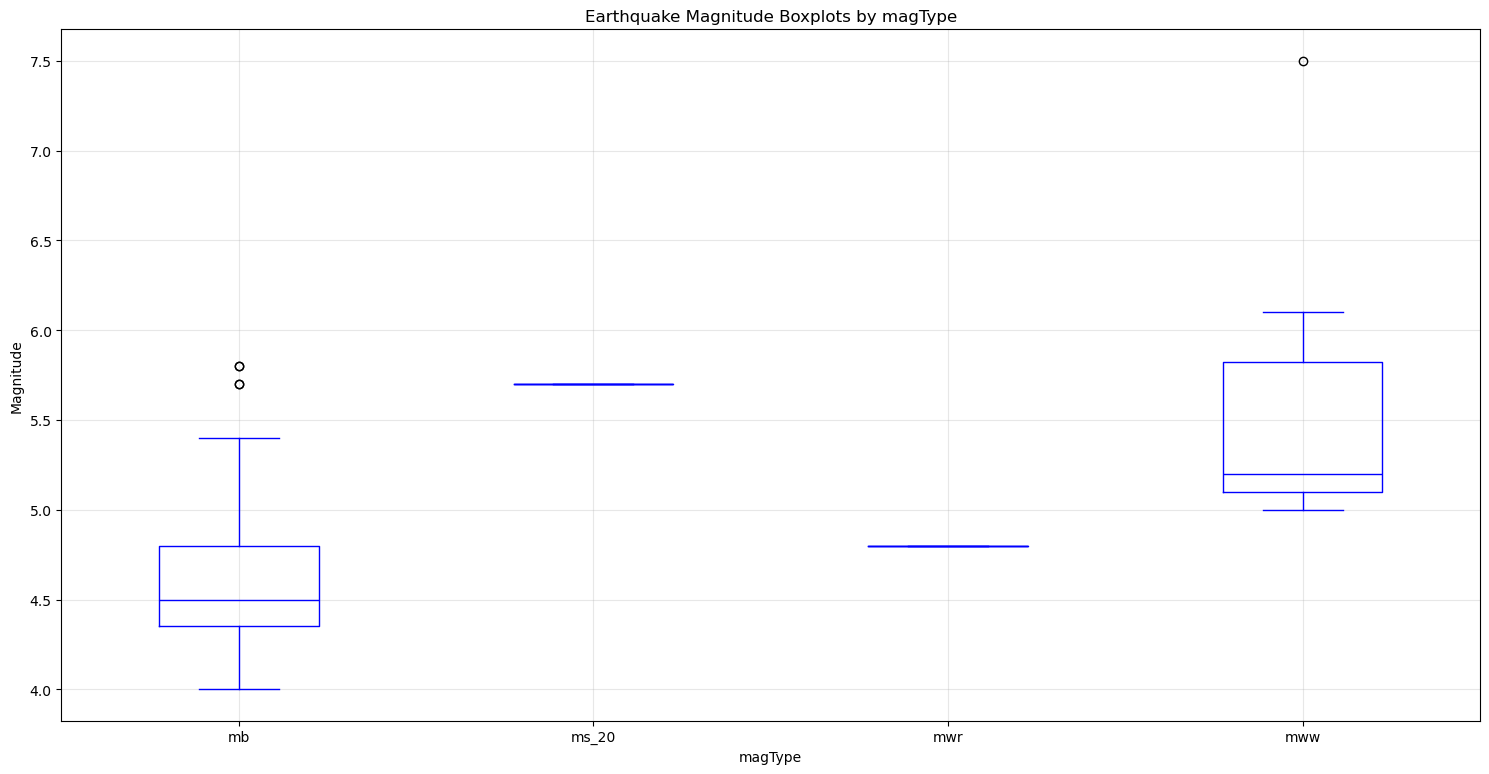

In [136]:
fig, ax = plt.subplots(figsize=(15, 8))

mag_indo.boxplot(
    column='mag',
    by='magType',
    color='blue',
    ax=ax
)

ax.set_title('Earthquake Magnitude Boxplots by magType')
ax.set_ylabel('Magnitude')
ax.grid(True, alpha = 0.3)
plt.suptitle('') 

# Show the plot
plt.tight_layout()
plt.show()

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

In [140]:
print("Maximum high price:", max(fb.high))

Maximum high price: 218.62


In [142]:
print("Minimum low price:", min(fb.low))

Minimum low price: 123.02


In [144]:
fb_diff = fb.resample('W').apply(
    lambda x: x['high'].max() - x['low'].min()
)
fb_diff

date
2018-01-07     9.3500
2018-01-14    11.5000
2018-01-21     6.5700
2018-01-28    10.2500
2018-02-04    13.4800
2018-02-11    23.4300
2018-02-18     8.6600
2018-02-25     8.2800
2018-03-04    12.6700
2018-03-11     9.6200
2018-03-18     4.9900
2018-03-25    18.1500
2018-04-01    13.8300
2018-04-08    11.0650
2018-04-15    12.6100
2018-04-22     5.6100
2018-04-29    20.9100
2018-05-06     7.8500
2018-05-13    11.2100
2018-05-20     5.6400
2018-05-27     4.7300
2018-06-03    10.8392
2018-06-10     8.5700
2018-06-17     8.4800
2018-06-24     9.7600
2018-07-01     7.6400
2018-07-08    11.4200
2018-07-15     6.6800
2018-07-22     6.6600
2018-07-29    45.6200
2018-08-05    12.2900
2018-08-12     9.9200
2018-08-19    10.5700
2018-08-26     4.6400
2018-09-02     5.0401
2018-09-09    13.8900
2018-09-16     6.8500
2018-09-23     8.3844
2018-09-30    10.8900
2018-10-07     9.6800
2018-10-14    11.4300
2018-10-21     7.9400
2018-10-28    13.5400
2018-11-04    17.3700
2018-11-11     8.9400
2018-

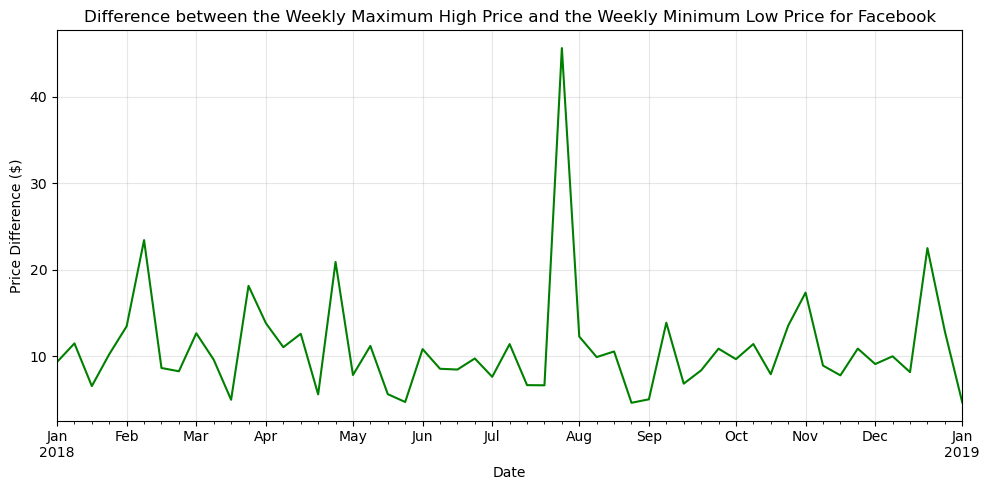

In [160]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot using the ax
fb_diff.plot(
    kind='line',
    y='max_high_min_low_diff',
    style='g-',           
    legend=False,
    ax=ax,                
    title='Difference between the Weekly Maximum High Price and the Weekly Minimum Low Price for Facebook'
)

ax.set_xlabel('Date')
ax.set_ylabel('Price Difference ($)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

- The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

- The second subplot will be a bar plot showing the net effect this had monthly, using resample().

- Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

- Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

In [163]:
fb.head()

,open,high,low,close,volume,fb_roll_20,change,open_to_close
date,,,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,181.42,3.74,3.74
2018-01-03,181.88,184.78,181.3300,184.67,16886563,181.42,2.79,2.79
2018-01-04,184.90,186.21,184.0996,184.33,13880896,181.42,-0.57,-0.57
2018-01-05,185.59,186.90,184.9300,186.85,13574535,181.42,1.26,1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,181.42,1.08,1.08


In [165]:
fb['daily_diff_open_close'] = fb['open'] - fb['close'].shift(1)

fb

,open,high,low,close,volume,fb_roll_20,change,open_to_close,daily_diff_open_close
date,,,,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,181.42,3.74,3.74,NaN
2018-01-03,181.88,184.78,181.3300,184.67,16886563,181.42,2.79,2.79,0.46
2018-01-04,184.90,186.21,184.0996,184.33,13880896,181.42,-0.57,-0.57,0.23
2018-01-05,185.59,186.90,184.9300,186.85,13574535,181.42,1.26,1.26,1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,181.42,1.08,1.08,0.35
...,...,...,...,...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002,124.06,0.96,0.96,-1.85
2018-12-26,126.00,134.24,125.8900,134.18,39723370,124.06,8.18,8.18,1.94
2018-12-27,132.44,134.99,129.6700,134.52,31202509,124.06,2.08,2.08,-1.74


C:\Users\micki\AppData\Local\Temp\ipykernel_29008\1964583224.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_net_eff = fb.resample('M')['daily_diff_open_close'].sum()


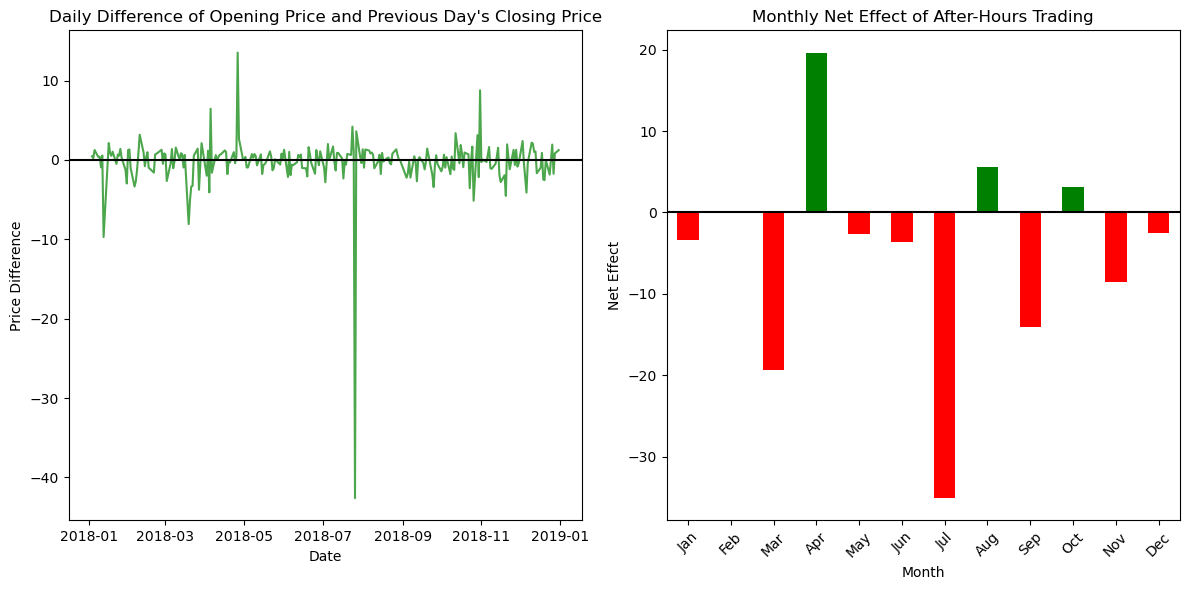

In [204]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Daily difference
axs[0].plot(fb.index, fb['daily_diff_open_close'], color='green', alpha=0.7)
axs[0].set_title('Daily Difference of Opening Price and Previous Day\'s Closing Price')
    
    # Label
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price Difference')
axs[0].axhline(0, color='black', linestyle='-')


# Plot 2: Monthly Net Effect as a bar plot
# Calculate monthly net effect using resample
monthly_net_eff = fb.resample('M')['daily_diff_open_close'].sum()

colors = ['green' if val >= 0 else 'red' for val in monthly_net_eff]  # green for gains, red for drops
monthly_net_eff.plot(kind='bar', ax=axs[1], color=colors)
axs[1].axhline(0, color='black', linestyle='-')

# Labels
axs[1].set_title('Monthly Net Effect of After-Hours Trading')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Net Effect')
    
    # Set the x-axis to show the month abbreviation
axs[1].set_xticks(range(len(monthly_net_eff)))  # Set positions for each month
axs[1].set_xticklabels([month.strftime('%b') for month in monthly_net_eff.index], rotation=45)

plt.tight_layout()
plt.show()

# Coclusion

> In this activity, I learned a lot about visualizing the obtained data. Although I felt a bit overwhelmed, I explored how after-hours trading affects Facebook’s stock price by calculating the daily difference between the opening price and the previous day’s close. This showed me how the price changes even when the market isn’t officially open.

> I chose to use ax for plotting because it gave me more control over the layout and styling. It’s also something I remembered from our VDA class, so it felt familiar and flexible for combining multiple plots in one figure.

> I then used resampling to see the bigger picture, looking at how these daily changes added up each month. Plotting the results helped me clearly see when Facebook’s stock gained or dropped—especially with green bars for gains and red for losses.

> Before, I learned how to individually create figures, but today it was expounded by learning to combine both --- cause before I can only do it using Tableau. With that, it was useful in comparing stock changes.

> In the end, this activity helped me understand both the technical side of data visualization and the real-world impact of trading behavior.